# 01. 결측값 찾기 

### 데이터 전처리 

In [4]:
import pandas as pd
airbnb_df = pd.read_csv('data/airbnb.csv')
airbnb_df

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [7]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             713 non-null    object 
 1   state          713 non-null    object 
 2   guests         713 non-null    int64  
 3   beds           713 non-null    int64  
 4   property_type  713 non-null    object 
 5   rating         700 non-null    float64
 6   n_reviews      713 non-null    int64  
 7   location       713 non-null    object 
 8   price          713 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 50.3+ KB


In [11]:
airbnb_df.isna()

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
708,False,False,False,False,False,False,False,False,False
709,False,False,False,False,False,False,False,False,False
710,False,False,False,False,False,False,False,False,False
711,False,False,False,False,False,False,False,False,False


In [13]:
airbnb_df.isna().sum()

id                0
state             0
guests            0
beds              0
property_type     0
rating           13
n_reviews         0
location          0
price             0
dtype: int64

airbnb_df.isna().any(axis=1)

In [17]:
airbnb_df[airbnb_df.isna().any(axis=1)] 

,id,state,guests,beds,property_type,rating,n_reviews,location,price
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
127,MB7199,Illinois,2,1,Apartment,NaN,0,"Rogers Park, Chicago.",74
189,DE6323,illinois,2,1,Condominium,NaN,0,"South Loop/Printers Row, Chicago.",79
206,ME5527,ILLINOIS,2,1,House,NaN,0,"Garfield Park, Chicago.",52
272,RM9271,illinois,2,1,Apartment,NaN,0,"Lincoln Park, Chicago.",64
275,TA9777,California,2,1,Condominium,NaN,0,"Pacific Heights, San Francisco.",115
366,LP6045,ILLINOIS,2,1,Apartment,NaN,0,"Loop, Chicago.",115
534,DC4208,ILLINOIS,5,3,House,NaN,0,"Little Italy/UIC, Chicago.",100
546,IE7576,illinois,1,1,House,NaN,0,"South Chicago, Chicago.",50
552,DY9962,California,1,1,Condominium,NaN,0,"Valley Village, Los Angeles.",85


# 02. 결측값 처리하기 실습

### 실습 설명 
### 효준이는 새로운 스마트폰을 구입하기 위해 애플과 삼성의 스마트폰 데이터를 수집했습니다. 그런데 실수로 특정 모델의 무게를 입력하는 것을 깜빡했다고 하는데요. 다행히 한 가지 모델만 누락되어 있고, 모델명이 같으면 용량이나 색상과 관계없이 무게가 동일하다고 합니다. 아래 표를 참고해서 cellphone_df에 있는 결측값을 올바른 값으로 채워 주세요. 그 다음에는 cellphone_df에서 2021년에 출시한 스마트폰들의 데이터만 출력해 주세요.
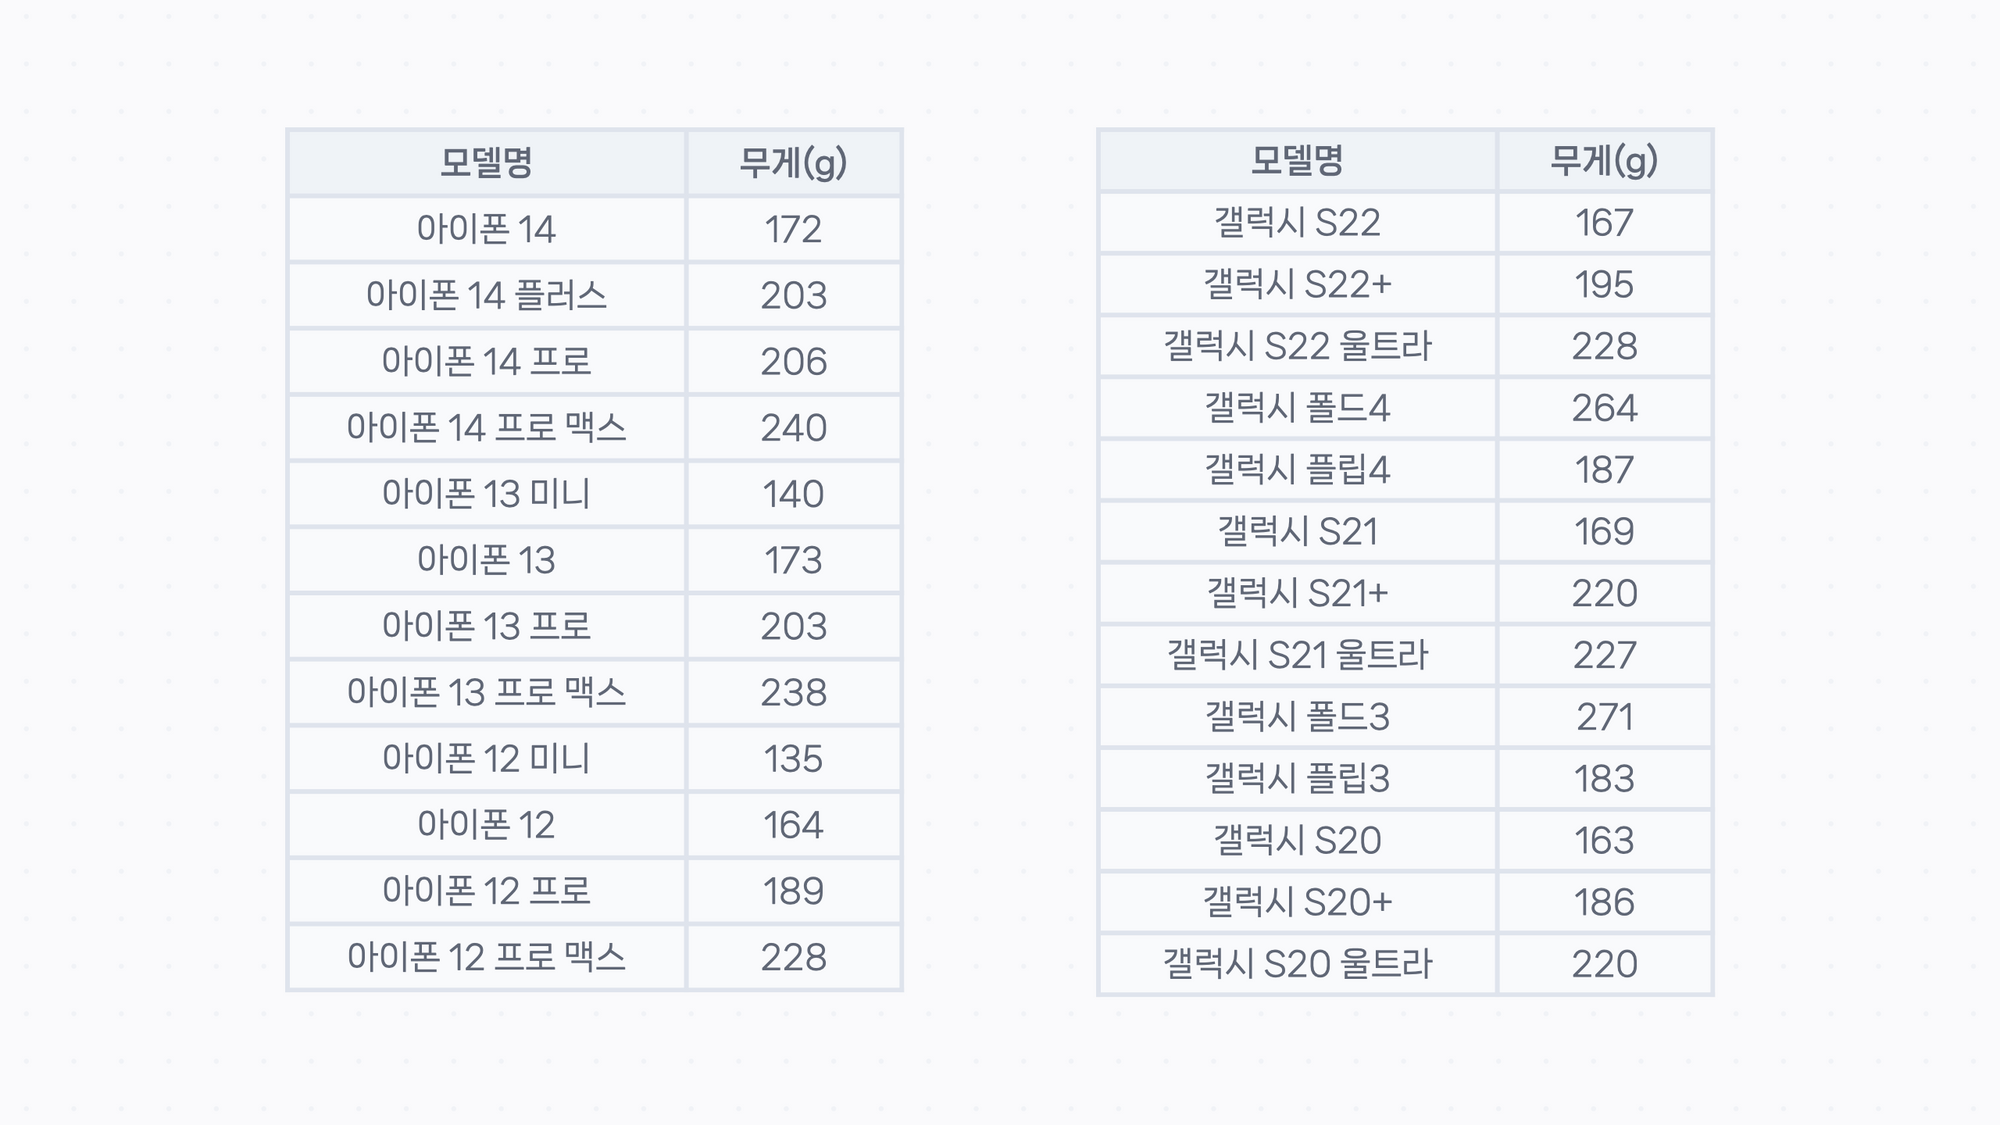
### 실습 결과 
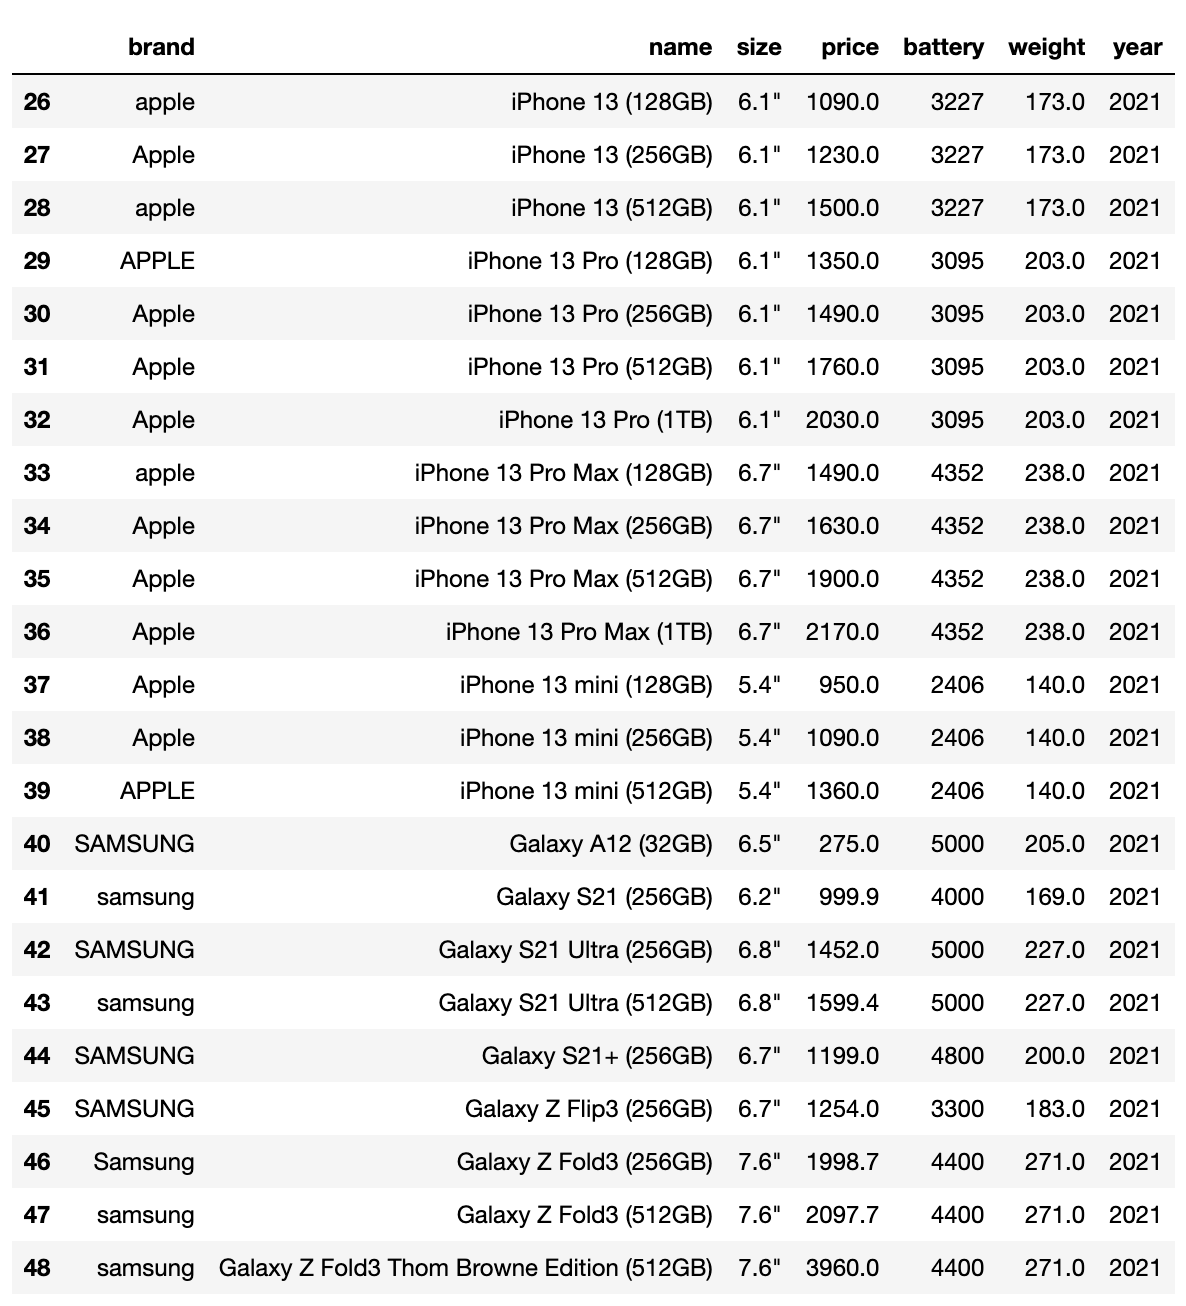aca7606afe89.png)

In [5]:
import pandas as pd

cellphone_df = pd.read_csv('data/cellphone.csv')
cellphone_df

,brand,name,size,price,battery,weight,year
0,apple,iPhone 14 (128GB),"6.1""",1250.0,3729,172.0,2022
1,apple,iPhone 14 (256GB),"6.1""",1400.0,3729,172.0,2022
2,Apple,iPhone 14 (512GB),"6.1""",1700.0,3729,172.0,2022
3,apple,iPhone 14 Plus (128GB),"6.7""",1350.0,4325,203.0,2022
4,APPLE,iPhone 14 Plus (256GB),"6.7""",1500.0,4325,203.0,2022
...,...,...,...,...,...,...,...
65,SAMSUNG,Galaxy S20 Ultra (512GB),"6.9""",1793.0,5000,220.0,2020
66,samsung,Galaxy S20+ (256GB),"6.7""",1353.0,4500,186.0,2020
67,SAMSUNG,Galaxy Z Flip2 (256GB),"6.7""",1650.0,3300,183.0,2020
68,Samsung,Galaxy Z Fold2 (256GB),"7.6""",1892.0,4500,282.0,2020


In [7]:
cellphone_df[cellphone_df.isna().any(axis=1)] 

,brand,name,size,price,battery,weight,year
37,Apple,iPhone 13 mini (128GB),"5.4""",950.0,2406,NaN,2021
38,Apple,iPhone 13 mini (256GB),"5.4""",1090.0,2406,NaN,2021
39,APPLE,iPhone 13 mini (512GB),"5.4""",1360.0,2406,NaN,2021


In [25]:
cellphone_df['weight'] = cellphone_df['weight'].fillna(140)
cellphone_df[cellphone_df['year'] == 2021]

,brand,name,size,price,battery,weight,year
26,apple,iPhone 13 (128GB),"6.1""",1090.0,3227,173.0,2021
27,Apple,iPhone 13 (256GB),"6.1""",1230.0,3227,173.0,2021
28,apple,iPhone 13 (512GB),"6.1""",1500.0,3227,173.0,2021
29,APPLE,iPhone 13 Pro (128GB),"6.1""",1350.0,3095,203.0,2021
30,Apple,iPhone 13 Pro (256GB),"6.1""",1490.0,3095,203.0,2021
31,Apple,iPhone 13 Pro (512GB),"6.1""",1760.0,3095,203.0,2021
32,Apple,iPhone 13 Pro (1TB),"6.1""",2030.0,3095,203.0,2021
33,apple,iPhone 13 Pro Max (128GB),"6.7""",1490.0,4352,238.0,2021
34,Apple,iPhone 13 Pro Max (256GB),"6.7""",1630.0,4352,238.0,2021
35,Apple,iPhone 13 Pro Max (512GB),"6.7""",1900.0,4352,238.0,2021


# 03. 중복값 찾기 

In [30]:
import pandas as pd
airbnb_df = pd.read_csv('data/airbnb.csv')
airbnb_df

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [32]:
airbnb_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
708    False
709    False
710    False
711    False
712    False
Length: 713, dtype: bool

In [36]:
airbnb_df.duplicated().sum() # 컴푸터가 True는 1 False는 0으로 쳐서 합게를 계산

2

In [38]:
airbnb_df[airbnb_df.duplicated()]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
496,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124


In [40]:
airbnb_df[airbnb_df.duplicated(subset='id')]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
448,LN3479,California,2,2,Apartment,98.0,19,"East Hollywood, Los Angeles.",88
452,LN3479,California,2,2,Apartment,99.0,25,"East Hollywood, Los Angeles.",91
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
496,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
527,QO8555,California,7,4,House,80.0,1,"Excelsior, San Francisco.",199
601,BZ3596,Illinois,2,1,House,89.0,30,"Lakeview, Chicago.",119


## cf)airbnb_df[airbnb_df.duplicated(subset='id', 'n_reviews', 'price')]와 같이 리스트를 넘길 수도 있음. 이렇게 하면 이 3개의 컬럼에 있는 값들이 모두 똑같아야 중복값으로 분류함 

In [47]:
airbnb_df[airbnb_df.duplicated(subset='id', keep='first')]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
448,LN3479,California,2,2,Apartment,98.0,19,"East Hollywood, Los Angeles.",88
452,LN3479,California,2,2,Apartment,99.0,25,"East Hollywood, Los Angeles.",91
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
496,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
527,QO8555,California,7,4,House,80.0,1,"Excelsior, San Francisco.",199
601,BZ3596,Illinois,2,1,House,89.0,30,"Lakeview, Chicago.",119


In [51]:
airbnb_df[airbnb_df.duplicated(subset='id', keep='last')]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
6,LN3479,California,2,2,Apartment,96.0,15,"East Hollywood, Los Angeles.",88
201,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
273,QO8555,California,7,4,House,85.0,3,"Excelsior, San Francisco.",199
448,LN3479,California,2,2,Apartment,98.0,19,"East Hollywood, Los Angeles.",88
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
541,BZ3596,Illinois,2,1,Apartment,91.0,28,"Lakeview, Chicago.",119


In [53]:
airbnb_df[airbnb_df.duplicated(subset='id', keep=False)]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
6,LN3479,California,2,2,Apartment,96.0,15,"East Hollywood, Los Angeles.",88
201,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
273,QO8555,California,7,4,House,85.0,3,"Excelsior, San Francisco.",199
448,LN3479,California,2,2,Apartment,98.0,19,"East Hollywood, Los Angeles.",88
452,LN3479,California,2,2,Apartment,99.0,25,"East Hollywood, Los Angeles.",91
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
496,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
527,QO8555,California,7,4,House,80.0,1,"Excelsior, San Francisco.",199
541,BZ3596,Illinois,2,1,Apartment,91.0,28,"Lakeview, Chicago.",119
601,BZ3596,Illinois,2,1,House,89.0,30,"Lakeview, Chicago.",119


# 04. 중복값 처리하기 

In [62]:
airbnb_df.duplicated().sum()

2

In [64]:
airbnb_df.drop_duplicates()

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [66]:
airbnb_df.drop_duplicates(subset='id')

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [68]:
airbnb_df.drop_duplicates(subset='id', keep='first')

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [70]:
airbnb_df.drop_duplicates(subset='id', keep='last')

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [74]:
airbnb_df = airbnb_df.drop_duplicates(subset='id', keep='last')

In [76]:
airbnb_df.duplicated().sum()

0

In [78]:
airbnb_df.duplicated(subset='id').sum()

0

# 05. 중복값 처리하기 실습 

### 실습 설명
#### 효준이가 스마트폰 데이터를 수집할 때 중복으로 여러 번 입력한 데이터가 몇 개 있다고 합니다. cellphone_df에서 중복값은 1개씩만 남기고 나머지는 삭제해 주세요. 참고로 중복으로 입력한 데이터는 모든 컬럼에 있는 값들이 똑같다고 합니다.

#### 주의 사항: 채점을 위해 가장 마지막 줄에는 cellphone_df라고 입력해서 DataFrame을 출력해 주세요.
### 실습 결과 
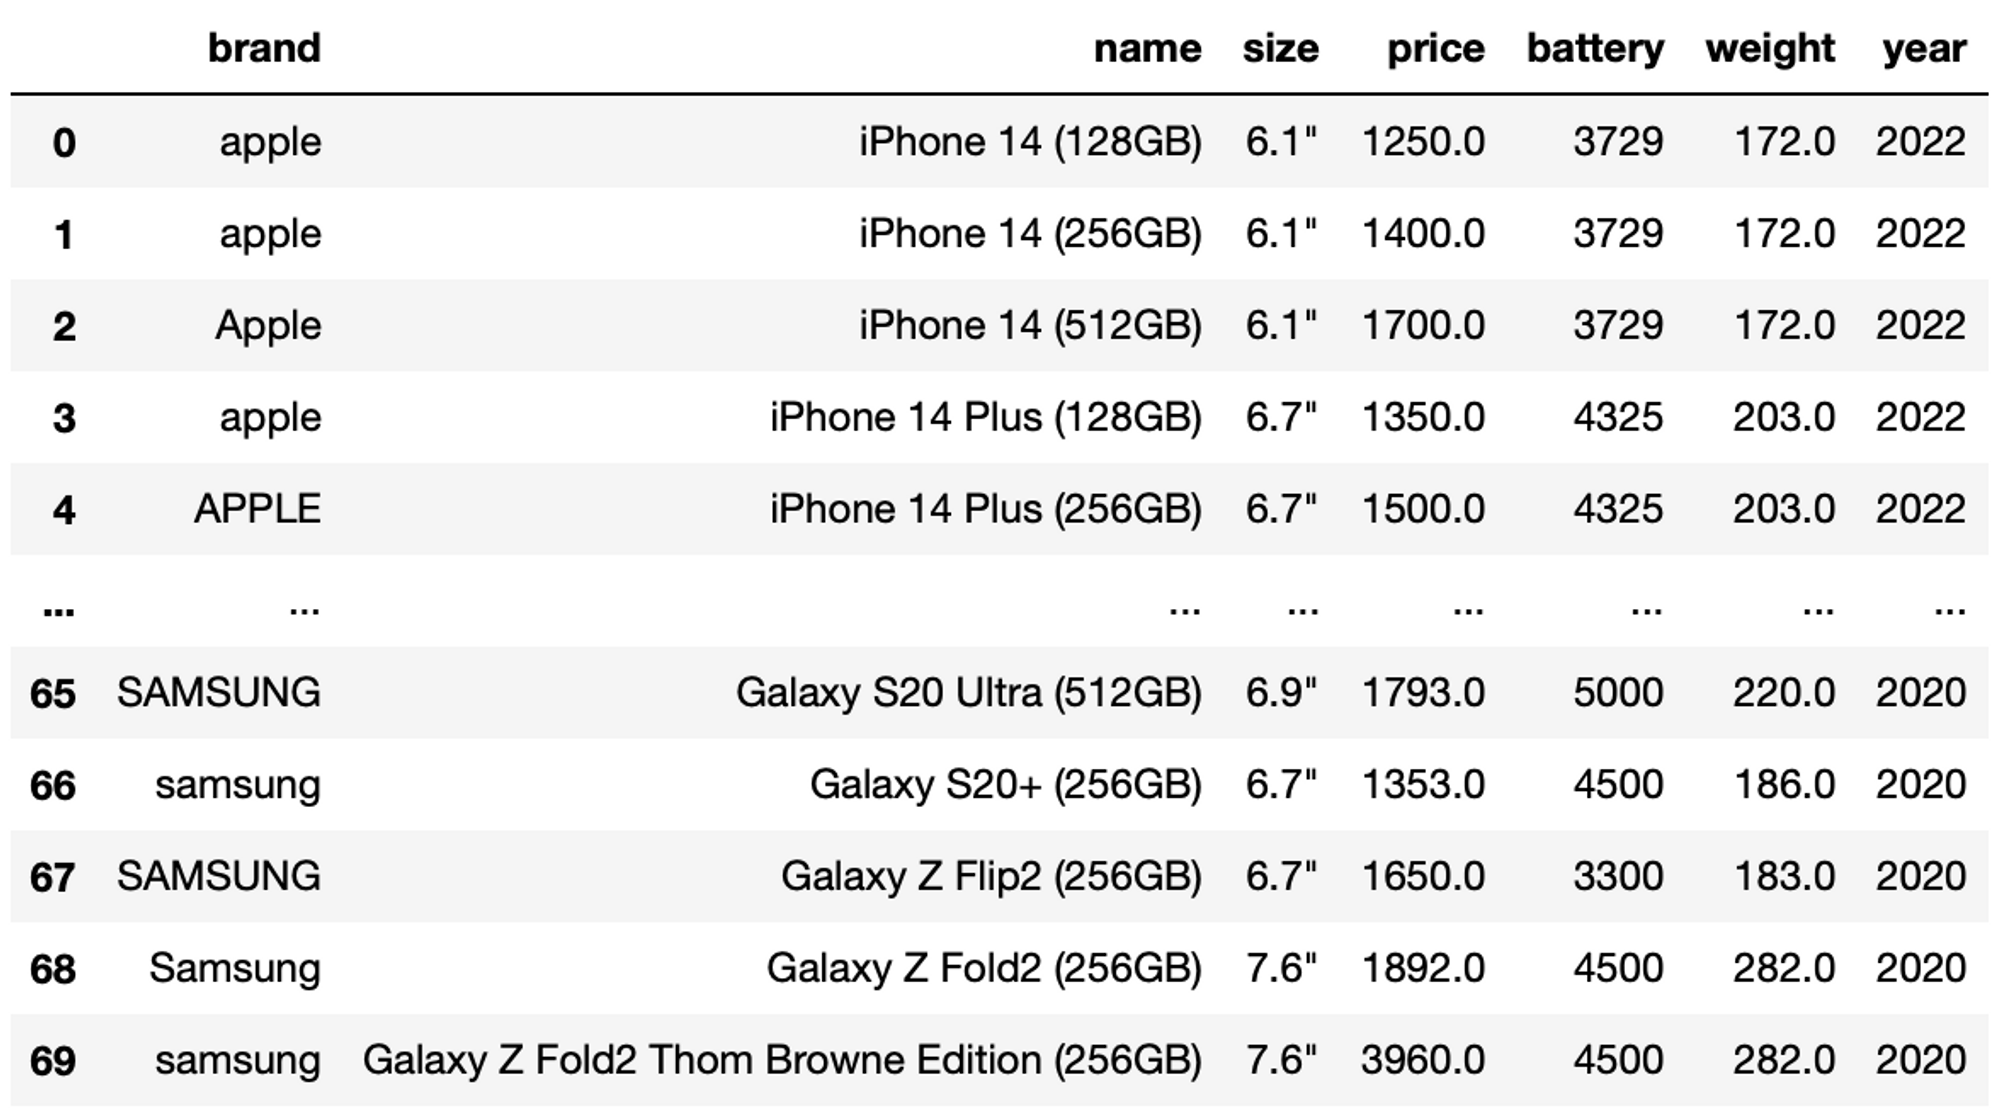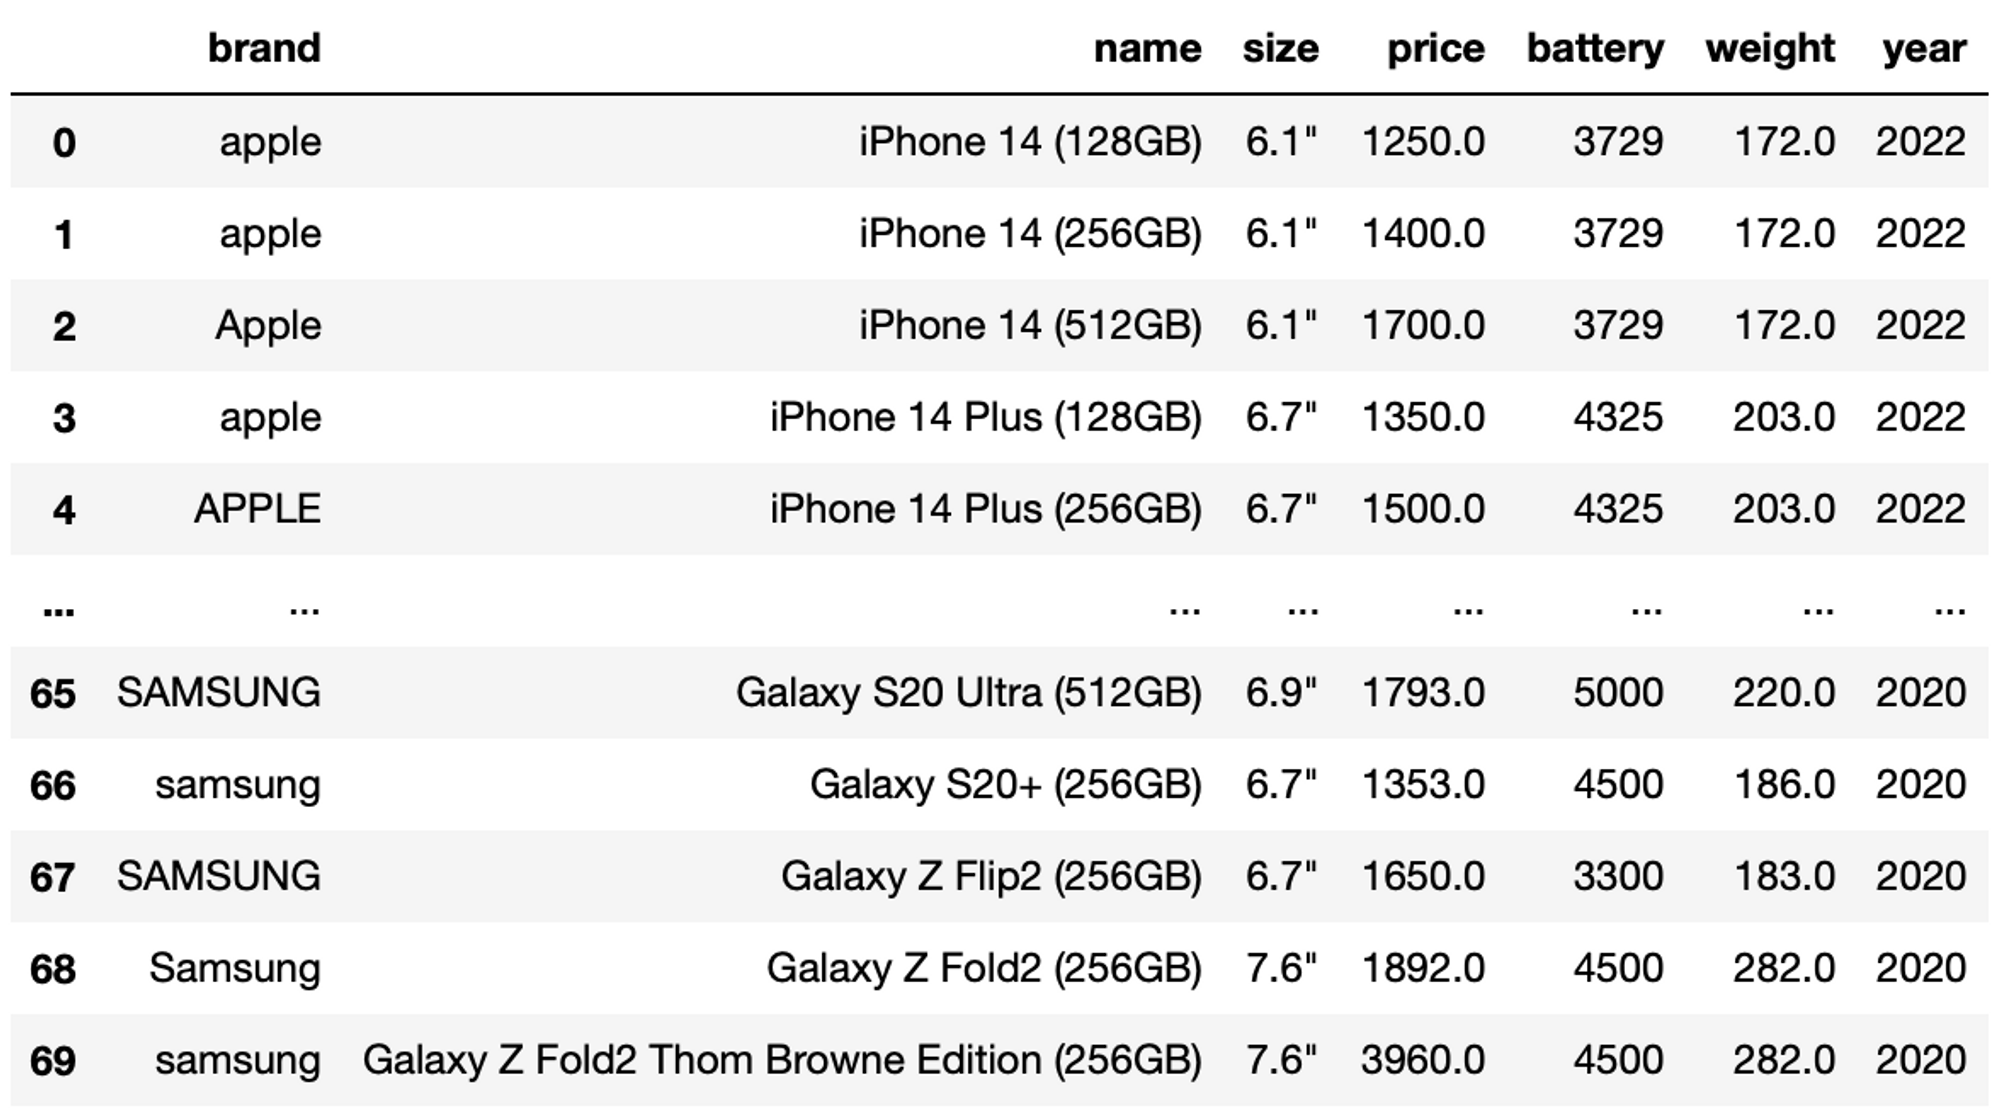

In [84]:
import pandas as pd

cellphone_df = pd.read_csv('data/cellphone.csv')

cellphone_df = cellphone_df.drop_duplicates()
cellphone_df

,brand,name,size,price,battery,weight,year
0,apple,iPhone 14 (128GB),"6.1""",1250.0,3729,172.0,2022
1,apple,iPhone 14 (256GB),"6.1""",1400.0,3729,172.0,2022
2,Apple,iPhone 14 (512GB),"6.1""",1700.0,3729,172.0,2022
3,apple,iPhone 14 Plus (128GB),"6.7""",1350.0,4325,203.0,2022
4,APPLE,iPhone 14 Plus (256GB),"6.7""",1500.0,4325,203.0,2022
...,...,...,...,...,...,...,...
65,SAMSUNG,Galaxy S20 Ultra (512GB),"6.9""",1793.0,5000,220.0,2020
66,samsung,Galaxy S20+ (256GB),"6.7""",1353.0,4500,186.0,2020
67,SAMSUNG,Galaxy Z Flip2 (256GB),"6.7""",1650.0,3300,183.0,2020
68,Samsung,Galaxy Z Fold2 (256GB),"7.6""",1892.0,4500,282.0,2020


# 06. 이상점(Outlier) 찾기 

In [88]:
airbnb_df

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [106]:
q1 = airbnb_df['price'].quantile(0.25)

In [108]:
q3 = airbnb_df['price'].quantile(0.75)

In [110]:
iqr = q3 - q1 

In [112]:
lower_limit = q1 - 1.5 * iqr 

In [120]:
upper_limit = q3 + 1.5 * iqr

In [122]:
airbnb_df['price'] < lower_limit

0      False
1      False
2      False
3      False
4      False
       ...  
708    False
709    False
710    False
711    False
712    False
Name: price, Length: 707, dtype: bool

In [124]:
airbnb_df[airbnb_df['price'] < lower_limit]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
13,HB7516,Illinois,1,1,Apartment,94.0,56,"Little Italy/UIC, Chicago.",14
43,IT4655,California,2,8,Hostel,91.0,27,"Westlake, Los Angeles.",14


In [126]:
airbnb_df['price'] < upper_limit

0      True
1      True
2      True
3      True
4      True
       ... 
708    True
709    True
710    True
711    True
712    True
Name: price, Length: 707, dtype: bool

In [130]:
airbnb_df[airbnb_df['price'] > upper_limit]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
91,FG7538,California,6,3,House,100.0,6,"Marina, San Francisco.",1800
442,ZL3688,California,16,8,Villa,92.0,7,"Malibu, Los Angeles.",1794


In [132]:
airbnb_df[(airbnb_df['price'] < lower_limit) | (airbnb_df['price'] > upper_limit)]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
13,HB7516,Illinois,1,1,Apartment,94.0,56,"Little Italy/UIC, Chicago.",14
43,IT4655,California,2,8,Hostel,91.0,27,"Westlake, Los Angeles.",14
91,FG7538,California,6,3,House,100.0,6,"Marina, San Francisco.",1800
442,ZL3688,California,16,8,Villa,92.0,7,"Malibu, Los Angeles.",1794


# 07. 이상점 처리하기 

## 1. 아무것도 하지않기( 이상점을 그대로 두는 경우도 있음) 

## 2. 모든 데이터가 이상점을 판별하는 기준점 안에 있도록 조정 (에를 들어, 이상점들을 한계점의 값들로 바꿔줌)

## 3. 이상점에 해당하는 데이터를 삭제 (이상점을 제외한 데이터의 전체적인 경향을 분석할 때)

In [139]:
airbnb_df

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [141]:
condition1 = airbnb_df['price'] >= lower_limit

In [145]:
condition2 = airbnb_df['price'] <= upper_limit

In [151]:
airbnb_df[condition1 & condition2]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


# 08. 이상점 처리하기 실습 

## 실습 설명 
### 효준이는 스마트폰 구매 후보에서 가격이 너무 싸거나 비싼 건 제외하려고 합니다. cellphone_df에서 가격을 기준으로 이상점으로 볼 수 있는 데이터는 삭제해 주세요.

### 주의 사항: 채점을 위해 가장 마지막 줄에는 cellphone_df라고 입력해서 DataFrame을 출력해 주세요.
## 실습 결과 
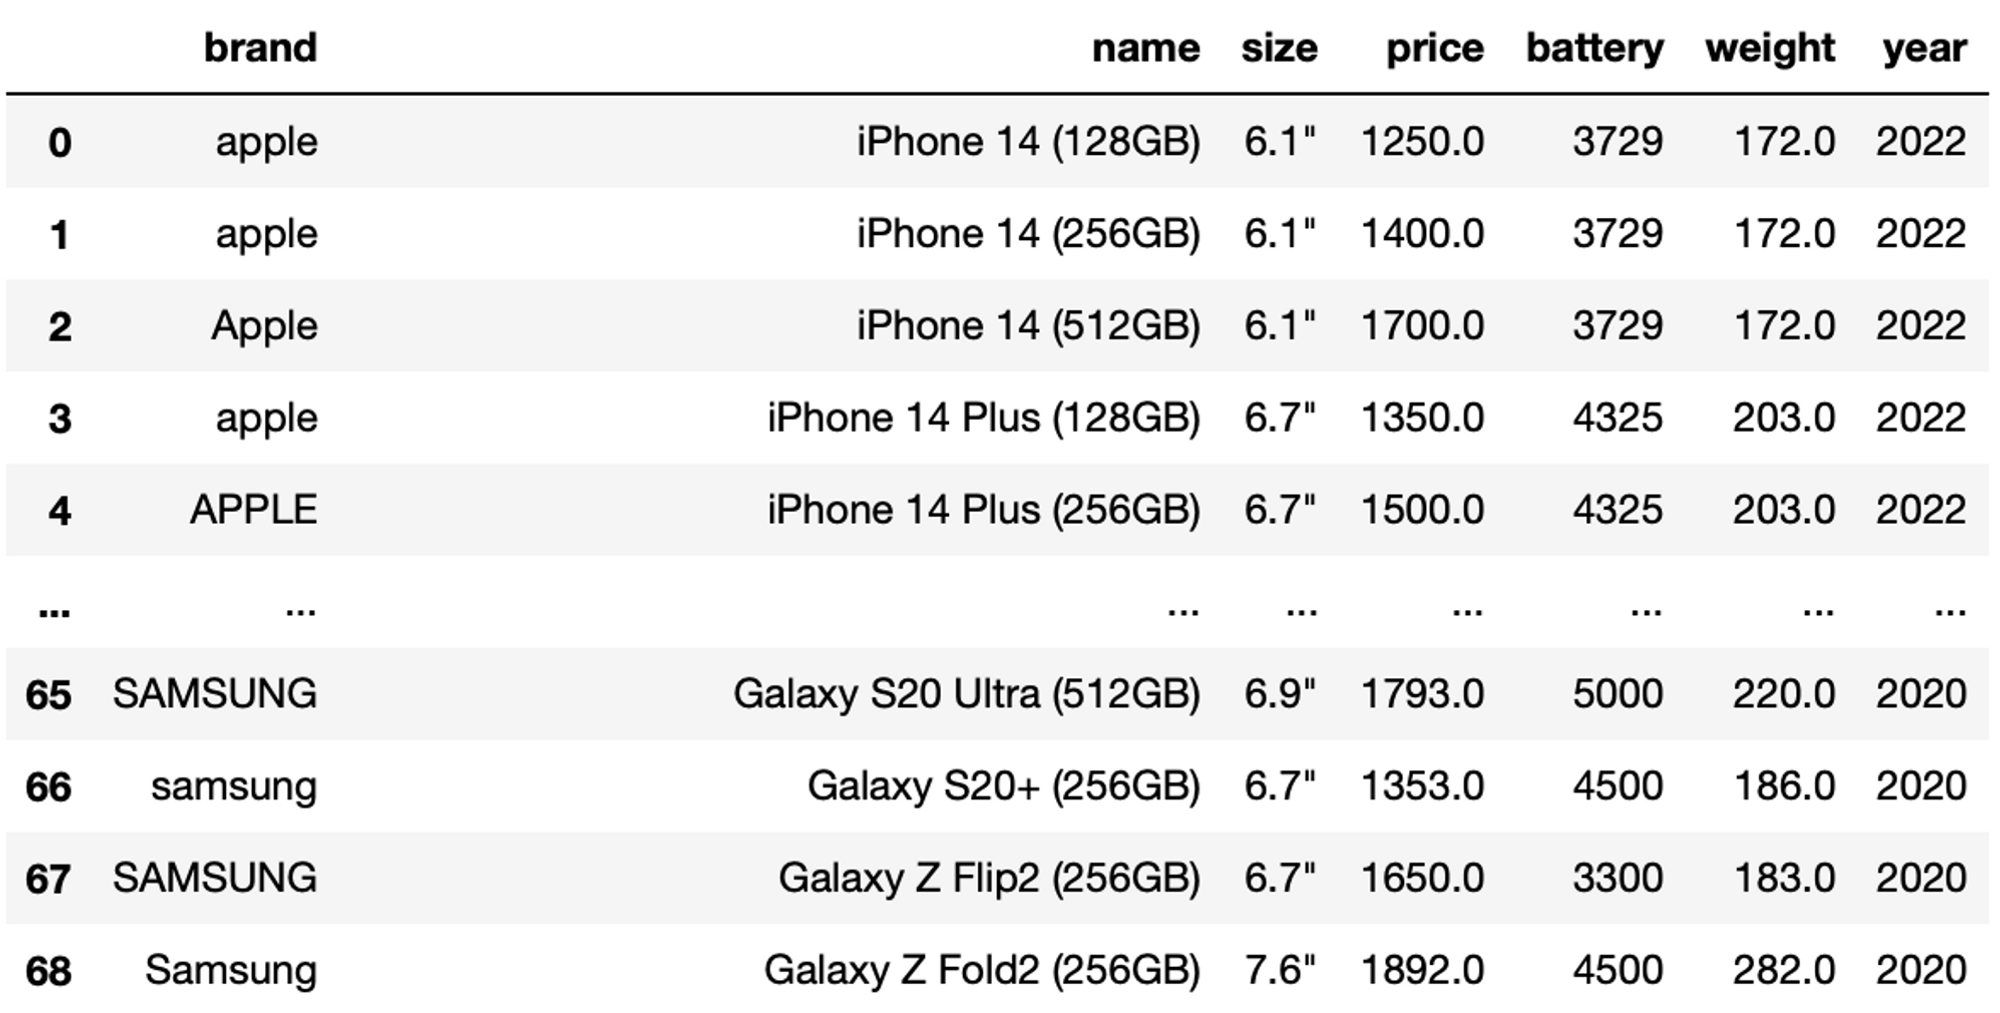

In [157]:
cellphone_df = pd.read_csv('data/cellphone.csv')

In [167]:
q1 = cellphone_df['price'].quantile(0.25)

In [169]:
q3 = cellphone_df['price'].quantile(0.75)

In [171]:
iqr = q3 - q1 

In [173]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [177]:
condition1 = cellphone_df['price'] <= upper_limit
condition2 = cellphone_df['price'] >= lower_limit
cellphone_df = cellphone_df[condition1 & condition2]
cellphone_df

,brand,name,size,price,battery,weight,year
0,apple,iPhone 14 (128GB),"6.1""",1250.0,3729,172.0,2022
1,apple,iPhone 14 (256GB),"6.1""",1400.0,3729,172.0,2022
2,Apple,iPhone 14 (512GB),"6.1""",1700.0,3729,172.0,2022
3,apple,iPhone 14 Plus (128GB),"6.7""",1350.0,4325,203.0,2022
4,APPLE,iPhone 14 Plus (256GB),"6.7""",1500.0,4325,203.0,2022
...,...,...,...,...,...,...,...
64,samsung,Galaxy S20 Ultra (256GB),"6.9""",1595.0,5000,220.0,2020
65,SAMSUNG,Galaxy S20 Ultra (512GB),"6.9""",1793.0,5000,220.0,2020
66,samsung,Galaxy S20+ (256GB),"6.7""",1353.0,4500,186.0,2020
67,SAMSUNG,Galaxy Z Flip2 (256GB),"6.7""",1650.0,3300,183.0,2020
